# Old Optimists, Young Pessimists

This example is based no Chapter 10 of *[Probably Overthinking It: How to Use Data to Answer Questions, Avoid Statistical Traps, and Make Better Decisions](https://greenteapress.com/wp/probably-overthinking-it)*, University of Chicago Press, 2023.

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
# download utils.py

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download(
    "https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/notebooks/utils.py"
)
download(
    "https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/examples/smooth.py"
)

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate

# Set the random seed so we get the same results every time
np.random.seed(17)

<IPython.core.display.Javascript object>

## Old Optimists, Young Pessimists

Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves? Almost every year since 1972, the General Social Survey (GSS) has posed that question to a representative sample of adult residents of the United States.

The following figure shows how the responses have changed over time.
The circles show the percentage of people in each survey who said that people try to be helpful.

In [5]:
# This dataset is prepared in GssExtract/notebooks/02_make_extract-2022_3a.ipynb

DATA_PATH = "https://github.com/AllenDowney/GssExtract/raw/main/data/interim/"
filename = "gss_extract_2022_3a.hdf"
download(DATA_PATH + filename)

<IPython.core.display.Javascript object>

In [6]:
gss = pd.read_hdf(filename, "gss")
gss.shape

(72390, 54)

<IPython.core.display.Javascript object>

In [7]:
gss["cohort"] = gss["cohort"].replace(9999, np.nan)
gss["cohort"].isna().sum()

755

<IPython.core.display.Javascript object>

In [8]:
def round_to_decade(x):
    return (x // 10) * 10


gss["cohort10"] = gss["cohort"].apply(round_to_decade)
gss["cohort10"].value_counts(dropna=False).sort_index()

cohort10
1880.0       45
1890.0      501
1900.0     1722
1910.0     3616
1920.0     5862
1930.0     7115
1940.0    10925
1950.0    14273
1960.0    11699
1970.0     7681
1980.0     5088
1990.0     2563
2000.0      545
NaN         755
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
from smooth import (
    plot_by_year,
    plot_by_cohort,
    make_table,
    plot_group,
    plot_table,
)

<IPython.core.display.Javascript object>

In [10]:
from utils import underride


def plot_titles(title, subtitle, y=1.02, pad=20, **options):
    """Plot the title and subtitle

    title: string
    subtitle: string
    y: y coordinate
    pad: space between title and subtitle
    options: passed to plt.text
    """
    plt.title(title, loc="left", pad=pad)

    transform = plt.gca().transAxes
    options = underride(options, color="0.2", ha="left", va="bottom", fontsize=11)
    plt.text(0, y, subtitle, transform=transform, **options)

    plt.tight_layout()

<IPython.core.display.Javascript object>

In [11]:
def decorate_by_year():
    plot_titles(title, subtitle)
    decorate(
        xlabel="Year of Survey",
        xlim=xlim,
        ylim=ylim,
    )

<IPython.core.display.Javascript object>

In [12]:
def decorate_by_cohort():
    plot_titles(title, subtitle)
    decorate(
        xlabel="Year of Birth",
        ylim=ylim,
    )

<IPython.core.display.Javascript object>

In [13]:
def decorate_group():
    plot_titles(title, subtitle)
    decorate(
        xlabel="Year of survey",
        xlim=xlim,
        ylim=ylim,
        loc="lower left",
    )

<IPython.core.display.Javascript object>

In [14]:
def decorate_table(**options):
    options = underride(
        options,
        xlabel="Year of survey",
        xlim=xlim,
        ylim=ylim,
        legend=False,
    )
    plot_titles(title, subtitle)
    decorate(**options)

<IPython.core.display.Javascript object>

## helpful

In [15]:
# https://gssdataexplorer.norc.org/variables/439/vshow

# 1 = helpful
# 2 = look out for themselves
# 3 = depends

<IPython.core.display.Javascript object>

In [16]:
yvar = "helpful"
yval = 1

series = gss[yvar]
series.value_counts()

helpful
1.0    20471
2.0    18972
3.0     2971
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
question = """Would you say that most of the time people try to be helpful, 
or that they are mostly just looking out for themselves?
"""

title = "Would people be helpful or look out for themselves?"
subtitle = "Percent saying helpful"
xlim = [1970.5, 2024.5]
ylim = [15, 75]

<IPython.core.display.Javascript object>

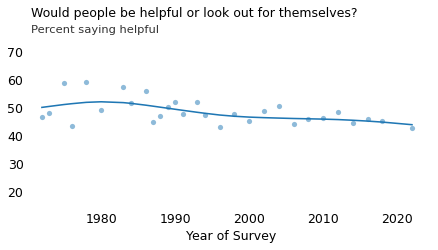

<IPython.core.display.Javascript object>

In [18]:
plot_by_year(gss, yvar, yval)
decorate_by_year()
plt.savefig(f"optimism_{yvar}_by_year", dpi=300)

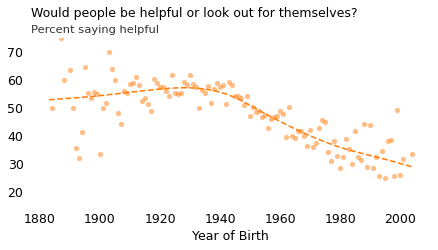

<IPython.core.display.Javascript object>

In [19]:
plot_by_cohort(gss, yvar, yval)
decorate_by_cohort()
plt.savefig(f"optimism_{yvar}_by_cohort", dpi=300)

In [20]:
subset = gss.dropna(subset=["cohort", yvar]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

table = make_table(subset, "year", yvar, "cohort10", yval)

<IPython.core.display.Javascript object>

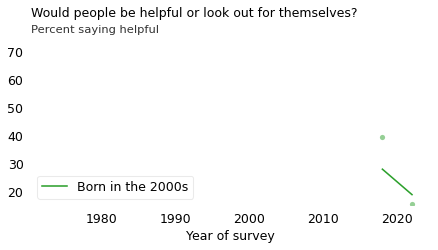

<IPython.core.display.Javascript object>

In [21]:
plot_group(table, 2000)
decorate_group()
plt.savefig(f"optimism_{yvar}_one_cohort", dpi=300)

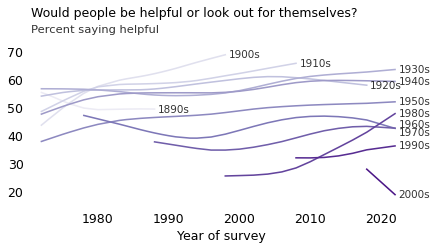

<IPython.core.display.Javascript object>

In [22]:
nudge = {"1960s": 1.4, "1970s": -1.4}
plot_table(table, nudge)
decorate_table()
plt.savefig(f"optimism_{yvar}_by_cohort_over_year", dpi=300)

## trust

In [56]:
question = """Generally speaking, would you say that most people can be trusted 
or that you can't be too careful in dealing with people?
"""

title = "Can most people be trusted?"
subtitle = "Percent saying yes"
ylim = [5, 65]

<IPython.core.display.Javascript object>

In [57]:
# https://gssdataexplorer.norc.org/variables/441/vshow

# 1 = can trust
# 2 = can't be too careful
# 3 = depends

<IPython.core.display.Javascript object>

In [58]:
yvar = "trust"
yval = 1

series = gss[yvar]
series.value_counts()

trust
2.0    24890
1.0    15783
3.0     1966
Name: count, dtype: int64

<IPython.core.display.Javascript object>

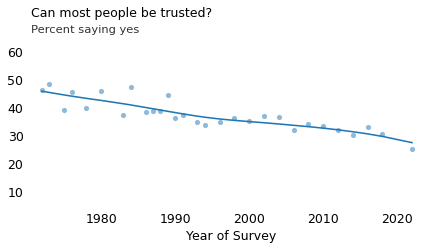

<IPython.core.display.Javascript object>

In [59]:
plot_by_year(gss, yvar, yval)
decorate_by_year()
plt.savefig(f"optimism_{yvar}_by_year", dpi=300)

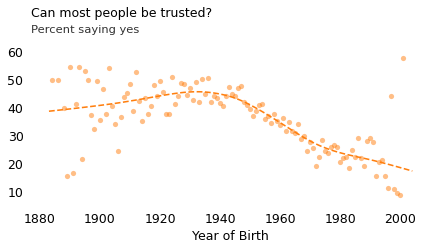

<IPython.core.display.Javascript object>

In [60]:
plot_by_cohort(gss, yvar, yval)
decorate_by_cohort()
plt.savefig(f"optimism_{yvar}_by_cohort", dpi=300)

In [61]:
subset = gss.dropna(subset=["cohort", yvar]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

table = make_table(subset, "year", yvar, "cohort10", yval)
del table[1890]

<IPython.core.display.Javascript object>

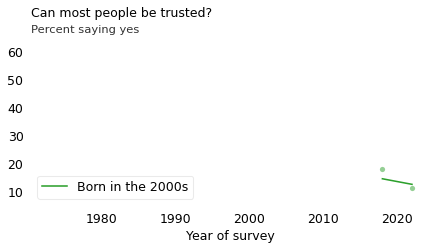

<IPython.core.display.Javascript object>

In [62]:
plot_group(table, 2000)
decorate_group()
plt.savefig(f"optimism_{yvar}_one_cohort", dpi=300)

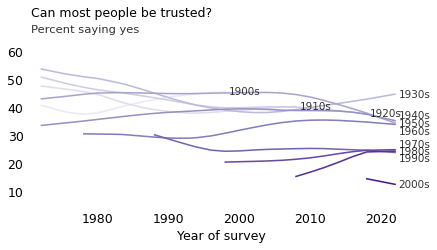

<IPython.core.display.Javascript object>

In [65]:
nudge = {
    "1940s": 2.5,
    "1950s": -0.9,
    "1960s": -2.4,
    "1970s": 2.9,
    "1980s": -0.5,
    "1990s": -2.8,
}
plot_table(table, nudge)
decorate_table()
plt.savefig(f"optimism_{yvar}_by_cohort_over_year", dpi=300)

## fair

In [31]:
question = """Do you think most people would try to take advantage of 
you if they got a chance, or would they try to be fair?
"""

title = "Would people try to be fair?"
subtitle = "Percent saying yes"
ylim = [0, 95]

<IPython.core.display.Javascript object>

In [32]:
# https://gssdataexplorer.norc.org/variables/440/vshow

# 1 = would take advantage
# 2 = would try to be fair
# 3 = depends

<IPython.core.display.Javascript object>

In [33]:
yvar = "fair"
yval = 2

series = gss[yvar]
series.value_counts()

fair
2.0    23484
1.0    15979
3.0     2837
Name: count, dtype: int64

<IPython.core.display.Javascript object>

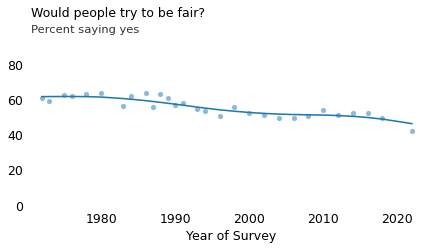

<IPython.core.display.Javascript object>

In [34]:
plot_by_year(gss, yvar, yval)
decorate_by_year()
plt.savefig(f"optimism_{yvar}_by_year", dpi=300)

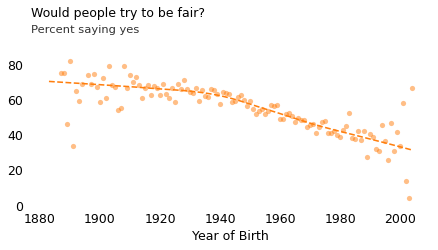

<IPython.core.display.Javascript object>

In [35]:
plot_by_cohort(gss, yvar, yval)
decorate_by_cohort()
plt.savefig(f"optimism_{yvar}_by_cohort", dpi=300)

In [36]:
subset = gss.dropna(subset=["cohort", yvar]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

table = make_table(subset, "year", yvar, "cohort10", yval)

<IPython.core.display.Javascript object>

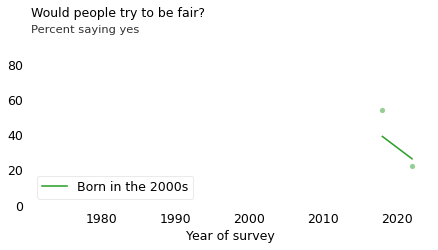

<IPython.core.display.Javascript object>

In [38]:
for group in table:
    plt.clf()
    plot_group(table, group)
    decorate_group()
    plt.savefig(f"optimism_{yvar}_{group}_by_year", dpi=300)

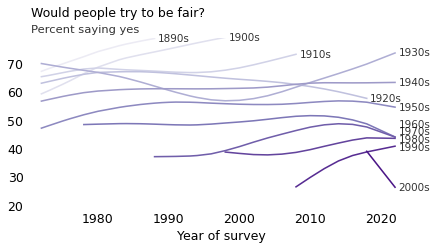

<IPython.core.display.Javascript object>

In [39]:
nudge = {"1960s": 4.5, "1970s": 1.8, "1980s": -0.3, "1990s": -0.3}
plot_table(table, nudge)
decorate_table(ylim=[20, 79])
plt.savefig(f"optimism_{yvar}_by_cohort_over_year", dpi=300)

## happy

In [40]:
question = """Taken all together, how would you say things are these days--
would you say that you are very happy, pretty happy, or not too happy?
"""

title = "Are you happy?"
subtitle = "Percent saying very happy"
ylim = [10, 45]

<IPython.core.display.Javascript object>

In [41]:
# https://gssdataexplorer.norc.org/variables/452/vshow

# 1 = very happy
# 2 = pretty happy
# 3 = not too happy

<IPython.core.display.Javascript object>

In [42]:
yvar = "happy"
yval = 1

series = gss[yvar]
series.value_counts()

happy
2.0    37446
1.0    21550
3.0     8681
Name: count, dtype: int64

<IPython.core.display.Javascript object>

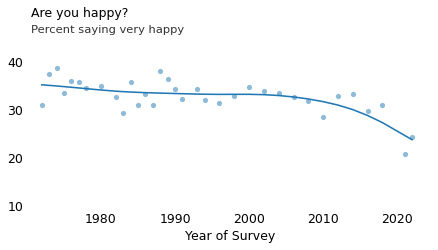

<IPython.core.display.Javascript object>

In [43]:
plot_by_year(gss, yvar, yval)
decorate_by_year()
plt.savefig(f"optimism_{yvar}_by_year", dpi=300)

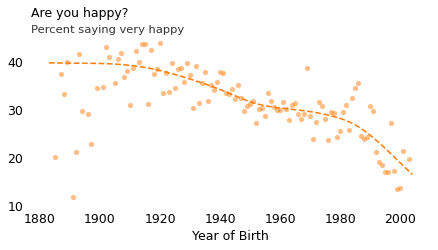

<IPython.core.display.Javascript object>

In [44]:
plot_by_cohort(gss, yvar, yval)
decorate_by_cohort()
plt.savefig(f"optimism_{yvar}_by_cohort", dpi=300)

In [45]:
subset = gss.dropna(subset=["cohort", yvar]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

table = make_table(subset, "year", yvar, "cohort10", yval)

<IPython.core.display.Javascript object>

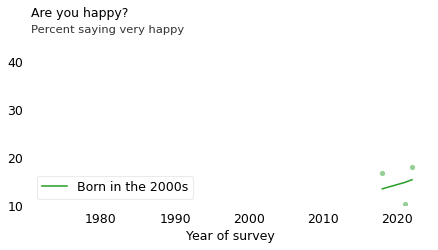

<IPython.core.display.Javascript object>

In [46]:
plot_group(table, 2000)
decorate_group()
plt.savefig(f"optimism_{yvar}_one_cohort", dpi=300)

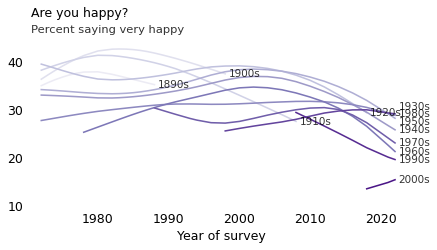

<IPython.core.display.Javascript object>

In [47]:
nudge = {"1930s": 2.5, "1950s": -1.3, "1960s": 0, "1970s": 0, "1980s": 0, "1990s": 0}
plot_table(table, nudge)
decorate_table()
plt.savefig(f"optimism_{yvar}_by_cohort_over_year", dpi=300)

## explore...

In [48]:
question = """
"""

title = ""
subtitle = "Percent saying"
ylim = [5, 65]

<IPython.core.display.Javascript object>

In [49]:
# https://gssdataexplorer.norc.org/variables/437/vshow

# 1 =
# 2 =
# 3 =

<IPython.core.display.Javascript object>

In [50]:
yvar = "conclerg"
yval = 1

series = gss[yvar]
series.value_counts()

conclerg
2.0    24416
1.0    12476
3.0    10475
Name: count, dtype: int64

<IPython.core.display.Javascript object>

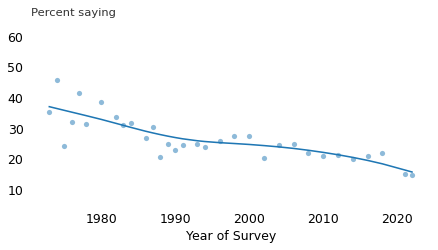

<IPython.core.display.Javascript object>

In [51]:
plot_by_year(gss, yvar, yval)
decorate_by_year()
plt.savefig(f"optimism_{yvar}_by_year", dpi=300)

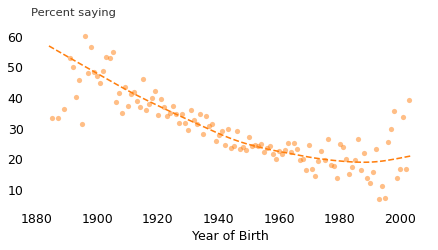

<IPython.core.display.Javascript object>

In [52]:
plot_by_cohort(gss, yvar, yval)
decorate_by_cohort()
plt.savefig(f"optimism_{yvar}_by_cohort", dpi=300)

In [53]:
subset = gss.dropna(subset=["cohort", yvar]).copy()
subset["cohort10"] = subset["cohort10"].astype(int)

table = make_table(subset, "year", yvar, "cohort10", yval)

<IPython.core.display.Javascript object>

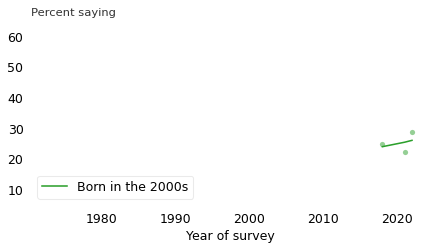

<IPython.core.display.Javascript object>

In [54]:
plot_group(table, 2000)
decorate_group()
plt.savefig(f"optimism_{yvar}_one_cohort", dpi=300)

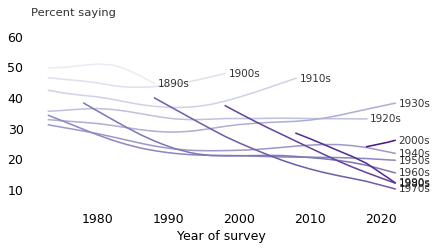

<IPython.core.display.Javascript object>

In [55]:
nudge = {"1950s": 0, "1960s": 0, "1970s": 0, "1980s": 0, "1990s": 0}
plot_table(table, nudge)
decorate_table()
plt.savefig(f"optimism_{yvar}_by_cohort_over_year", dpi=300)

Copyright 2024 Allen Downey 

The code in this notebook and `utils.py` is under the [MIT license](https://mit-license.org/).